In [98]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [99]:
train_data=pd.read_excel(r"E:\Project\predicting_restaurant_food.xlsx")
test_data=pd.read_excel(r"E:\Project\resturant_food_test.xlsx")

In [100]:
#loading train data
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [101]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [102]:
print(train_data.shape)
print(test_data.shape)

(12690, 9)
(4231, 8)


# Now we will load train_data
Train Data

In [103]:
#checking the columns of train_data
train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [104]:
#checking info train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 545.3+ KB


In [105]:
#checking null values
train_data.isnull().values.any()

True

In [106]:
train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [107]:
#inputing null value with mode as it is in categorical data
for col in ["CITY","LOCALITY","RATING","VOTES"]:
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)

In [108]:
#checking null values again
train_data.isnull().values.any()

False

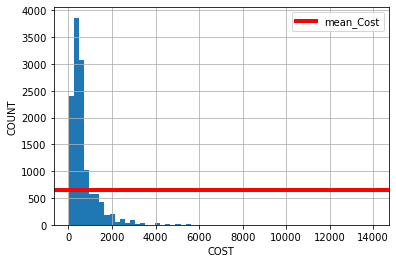

In [109]:
#ploting cost with histogram
COST=train_data["COST"].hist(bins=60)
mean_val=np.mean(train_data["COST"])
plt.axhline(mean_val,linewidth=4,color="r",label="mean_Cost")
plt.xlabel("COST")
plt.ylabel("COUNT")
plt.legend()
plt.show()

# Explore Data Variable

In [110]:
for column in train_data.columns:
    if train_data[column].dtype==object:
        print(str(column)+ " : " +str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print("*************************************************************************************************")
        print("/n")

TITLE : ['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' '

# EDA

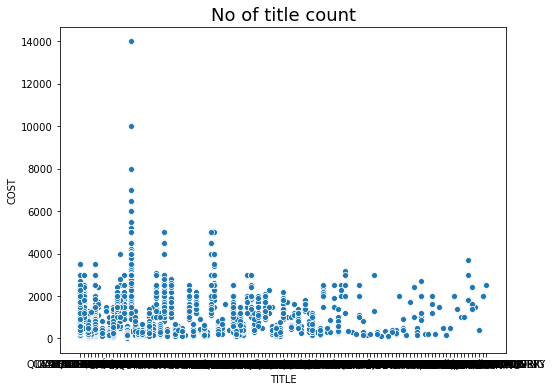

In [111]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="TITLE",y="COST",data=train_data,palette="rainbow")
plt.title("No of title count",fontsize=18)
plt.show()

In [112]:
print(train_data["TITLE"].value_counts())

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
CAFÉ,FINE DINING                   1
CASUAL DINING,DESSERT PARLOR       1
SWEET SHOP,BEVERAGE SHOP           1
MICROBREWERY,LOUNGE                1
LOUNGE,FINE DINING                 1
Name: TITLE, Length: 113, dtype: int64


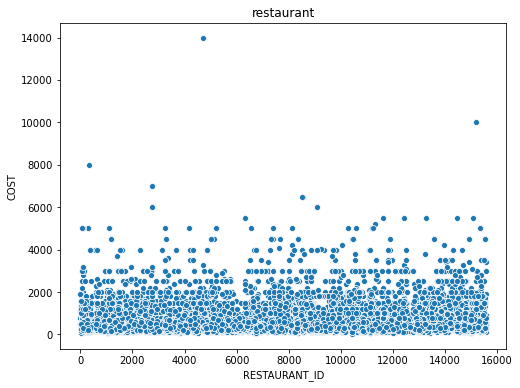

In [113]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="RESTAURANT_ID",y="COST",data=train_data,palette="rainbow")
plt.title("restaurant")
plt.show()

In [114]:
print(train_data.groupby("RESTAURANT_ID")["COST"].value_counts())

RESTAURANT_ID  COST
0              1900    1
1              500     1
2              1100    1
4              800     1
6              200     2
                      ..
15567          600     1
15568          900     1
15569          300     1
15571          400     1
15573          500     1
Name: COST, Length: 12429, dtype: int64


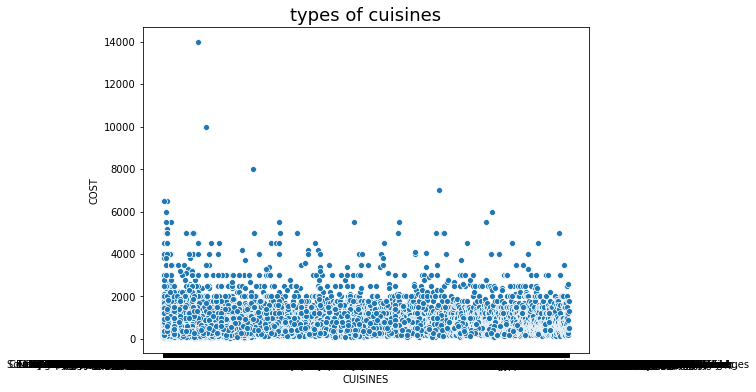

In [115]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="CUISINES",y="COST" ,data=train_data,palette="rainbow")
plt.title("types of cuisines",fontsize=18)
plt.show()

In [116]:
#getting information about cusines and cost
print(train_data.groupby("CUISINES")["COST"].value_counts())

CUISINES                                                     COST
Afghan, Mughlai                                              250     1
African, Burger, Desserts, Beverages, Fast Food, Salad       900     1
American                                                     500     2
                                                             1300    2
                                                             200     1
                                                                    ..
Vietnamese, Thai, Burmese, Japanese                          1000    1
Wraps                                                        500     1
Wraps, Biryani, North Indian, Kebab, Desserts, Salad, Pizza  500     1
Wraps, Fast Food                                             250     1
Wraps, Sandwich, Rolls, Fast Food, Burger, Pizza             400     1
Name: COST, Length: 6984, dtype: int64


In [117]:
print(train_data["TITLE"].unique())

['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DESSERT 

In [118]:
print(train_data["RESTAURANT_ID"].unique())

[ 9438 13198 10915 ... 13228  9686  6134]


In [119]:
print(train_data["CUISINES"].unique())

['Malwani, Goan, North Indian' 'Asian, Modern Indian, Japanese'
 'North Indian, Chinese, Biryani, Hyderabadi' ...
 'North Indian, Burger, Kebab' 'Goan, Continental'
 'Finger Food, Continental, Asian, Chinese']


In [120]:
print(train_data["CITY"].unique())

['Thane' 'Chennai' 'Mumbai' 'Bangalore' 'Gurgaon' 'Hyderabad' 'Kochi'
 'Thane West' 'Andheri Lokhandwala' 'New Delhi' 'Andheri West'
 'Malad East' '682036' 'Bangalor' 'Navi Mumbai' 'Bandra West' 'Delhi'
 'Noida' 'Bangalore-560066' 'Secunderabad' 'India' 'Madhuranagar'
 'Chennai Teynampet' 'Faridabad' 'Chembur.' 'Maharashtra'
 'opp gurudwara Shakurpur' 'Telagana Land Line:040-48507016' 'Ghaziabad'
 'Karnataka' 'Kerala' 'Edappally' 'Kadavanthra' 'Ernakulam Circle kochi'
 'Bengalore' 'Near Reliance Fresh' 'Kilpauk' 'Bengaluru' 'Kothaguda'
 'Goregaon West' 'Banglore' 'Tamil Nadu' 'Kakkanad' 'Kochi Elamkulam'
 'Outer Ring Road' 'Mulund East'
 'Secunderabad main road near signal NMREC COLLEGE' 'Telangana'
 'Ponnuruni Kochi' 'Gachibowli' 'Semmancheri'
 '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034'
 'Mumbai Mahim' 'Powai (Next to Powai Plaza)' 'Dombivali East'
 'Kochi Vyttila' 'Kandivali' 'Kochi Palarivattom' 'Dewan Rama Road'
 'Gurugram' 'Sector 51 Noida' 'Kaloor' 'Besant Na

In [121]:
print(train_data["RATING"].unique())

['3.6' '4.2' '3.8' '4.1' '4.0' '4.3' '3.9' '3.3' '3.4' '-' '4.5' '3.5'
 '4.4' '2.7' '3.7' '4.7' 'NEW' '3.1' '2.5' '4.6' '2.8' '3.0' '3.2' '2.6'
 '2.9' '4.9' '4.8' '2.4' '2.3' '2.0' '2.1' '2.2']


In [122]:
print(train_data["COST"].unique())

[ 1200  1500   800   300   600  1600   200   900   400  1400   350   500
   450   700  1000   250  2000  1100   100   850  2500  1800   150   650
  3500   750   950  1300   180  2100   550    50  1900  1750  1350    60
  2200  5000    80  3300  3800  1450  4000  2800   120  4500  2400  1700
  3000  2600  5200 14000  1550  4200  3700  1150  2700   130  8000  3200
  5500  6500  1050 10000  3600   313  3400  2300  3100  1250    20  1650
  1850  6000   140  4100  4050  2900   599  7000   299   370  1950   320
  1260    70]


In [123]:
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# Converting Categorical data into numeric 

In [124]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data["TITLE"]=le.fit_transform(train_data["TITLE"])

In [125]:
train_data["CUISINES"]=le.fit_transform(train_data["CUISINES"])

In [126]:
train_data["TIME"]=le.fit_transform(train_data["TIME"])

In [127]:
train_data["CITY"]=le.fit_transform(train_data["CITY"])

In [128]:
train_data["LOCALITY"]=le.fit_transform(train_data["LOCALITY"])

In [129]:
train_data["RATING"]=le.fit_transform(train_data["RATING"])

In [130]:
train_data["VOTES"]=le.fit_transform(train_data["VOTES"])

In [131]:
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,19,1349,500
12686,33,9686,2143,1177,222,133,24,191,1800
12687,71,11133,2088,1137,239,1342,21,1428,1300
12688,31,6134,3506,1837,67,631,16,996,400


# Now all column change into numeric data type of train data now same  step are follow in test daat

# Test Data

In [132]:
#checking column in test data
test_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [133]:
#checking info in test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4178 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 148.8+ KB


In [134]:
#checking null values
test_data.isnull().values.any()

True

In [135]:
test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              53
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [136]:
#imputing null values with mode as it is categoriacl data
for col in ["CITY","LOCALITY","RATING","VOTES"]:
    test_data[col].fillna(test_data[col].mode()[0],inplace=True)

In [137]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


# Exploring Data Variable

In [138]:
for column in test_data.columns:
    if test_data[column].dtype==object:
        print(str(column)+ " : "+str(test_data[column].unique()))
        print(test_data[column].value_counts())
        print("*******************************************************************************")
        print("/n")
        

TITLE : ['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAKERY,CASUAL DINING' 'BAR' 'FOOD COURT'
 'QUICK BITES,SWEET SHOP' 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR'
 'KIOSK' 'CAFÉ,BAKERY' 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,CAFÉ' 'MESS' 'BAR,CASUAL DINING'
 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR' 'PUB,FINE DINING'
 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING' 'LOUNGE,CASUAL DINING'
 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR' 'CASUAL DINING,SWEET SHOP'
 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB' 'FOOD TRUCK'
 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT P

In [139]:
test_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [140]:
#checking unique value in test data
print(test_data["TITLE"].unique())

['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAKERY,CASUAL DINING' 'BAR' 'FOOD COURT'
 'QUICK BITES,SWEET SHOP' 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR'
 'KIOSK' 'CAFÉ,BAKERY' 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,CAFÉ' 'MESS' 'BAR,CASUAL DINING'
 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR' 'PUB,FINE DINING'
 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING' 'LOUNGE,CASUAL DINING'
 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR' 'CASUAL DINING,SWEET SHOP'
 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB' 'FOOD TRUCK'
 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PARLOR' '

In [141]:
print(test_data["RESTAURANT_ID"].unique())

[ 4085 12680  1411 ...  8617  6485  2421]


In [142]:
print(test_data["CUISINES"].unique())

['North Indian, Chinese, Mughlai, Kebab'
 'South Indian, Fast Food, Pizza, North Indian'
 'North Indian, Seafood, Biryani, Chinese' ...
 'North Indian, Chinese, Kebab, Juices' 'Sindhi, Street Food'
 'Rolls, Beverages']


In [143]:
print(test_data["TIME"].unique())

['12noon – 12midnight (Mon-Sun)' '7am – 12:30AM (Mon-Sun)'
 '11am – 11:30pm (Mon-Sun)' ...
 '12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...'
 '6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), 6am...'
 '11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun), 3pm...']


In [144]:
print(test_data["CITY"].unique())

['Noida' 'Mumbai' 'Faridabad' 'Kochi' 'Hyderabad' 'Navi Mumbai' 'Chennai'
 'New Delhi' 'Bangalore' 'Vasai Mumbai' 'Gurgaon' 'Palarivattom' 'Delhi'
 'Ernakulam' 'Thane West' 'Ghaziabad' 'Chennai.' 'Thane' 'Telangana'
 'Bandra West' 'Potheri' 'Panathur Main Road' 'Secunderabad' 'JP Nagar'
 'Near Andheri West Station'
 'opposite to western side of ITPL Service gate' 'Kalkaji' 'Bengaluru'
 'APR Chambers' 'Tamil Nadu 600102' 'Andheri West' 'India'
 'Serilingampally' 'Maharashtra.' 'Gandhinagar Rd'
 'Near Andheri East Station' 'HSR Layout' 'Greater Noida' 'Uttar Pradesh'
 'Dwarka' 'Velachery' 'Anna Nagar West' 'Indiranagar' 'Whitefield'
 'Kochi Ravipuram' 'Madhapur' 'Hyderabad.' 'Mira Road Thane Mumbai'
 'India Gate New Delhi' '1st Stage' 'Sholinganallur. Chennai'
 'Chennai (Above Bombay Brasserie)' 'Powai' 'Marathahalli' 'Kaloor'
 'kochi' 'Gurugram' 'Tripunithura' 'Kakkanad' 'Girgaum' 'Delhi NCR'
 'Kurla (W)' 'Secunderabad.' 'Thane West Thane West' 'Banjara Hills'
 'Kochi Panampilly Nagar' 

In [145]:
print(test_data["LOCALITY"].unique())

['Sector 18' 'Grant Road' 'Marine Lines' 'NIT' 'Kaloor' 'Banjara Hills'
 'Kharghar' 'Navalur' 'IP Extension' 'Palarivattom' 'Electronic City'
 'West Mambalam' 'Worli' 'Ulsoor' 'Abids' 'MG Road' 'Dahisar West'
 'Vijay Nagar' 'Fort' 'Anna Salai' 'East' 'DLF Phase 4' 'Banaswadi'
 'Jubilee Hills' 'Sector 15' 'BTM' 'Elamkulam' 'Bandra West' 'Aluva'
 'Indiranagar' 'Marol' 'Whitefield' 'Fort Kochi' 'Film Nagar' 'Edappally'
 'Bandra Kurla Complex' 'Marathahalli' 'Dombivali East'
 'N.W.A Punjabi Bagh' 'Kodambakkam' 'Anna Nagar West' 'Sarjapur Road'
 'Tripunithura' 'Matunga East' 'Kathrikadavu' 'Mylapore' 'Kakkanad'
 'Malakpet' 'Kandivali West' 'Sector 31' 'Kalyan East' 'Necklace Road'
 'Sector 49' 'Miyapur' 'Ashok Nagar' 'Aerocity' 'Purasavakkam'
 'Srinagar Colony' 'Madhapur' 'Kalyan' 'Subhash Nagar' 'Pallimukku'
 'Vikas Marg' '35/581&582 Janatha Junction' 'Krishna Nagar' 'Chanakyapuri'
 'Thevera' 'Vasant Vihar' 'Indirapuram' 'Sushant Lok' 'Ghatkopar East'
 'Anna nagar' 'Bannerghatta Road' 'Par

In [146]:
print(test_data["RATING"].unique())

['4.3' '4.2' '3.8' '3.6' '3.7' 'NEW' '4.0' '3.4' '3.2' '4.1' '3.0' '-'
 '3.5' '4.5' '3.9' '3.3' '2.9' '3.1' '2.5' '2.8' '4.6' '4.4' '2.7' '4.8'
 '2.6' '4.9' '2.1' '4.7' '2.3' '2.4' '2.2']


In [147]:
print(test_data["VOTES"].unique())

['564 votes' '61 votes' '350 votes' ... '1697 votes' '749 votes'
 '1239 votes']


In [148]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


# Converting test_data Categorical data in numeric

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
test_data["TITLE"]=le.fit_transform(test_data["TITLE"])
test_data["CUISINES"]=le.fit_transform(test_data["CUISINES"])
test_data["TIME"]=le.fit_transform(test_data["TIME"])
test_data["LOCALITY"]=le.fit_transform(test_data["LOCALITY"])
test_data["RATING"]=le.fit_transform(test_data["RATING"])
test_data["VOTES"]=le.fit_transform(test_data["VOTES"])

In [151]:
test_data.dtypes

TITLE             int32
RESTAURANT_ID     int64
CUISINES          int32
TIME              int32
CITY             object
LOCALITY          int32
RATING            int32
VOTES             int32
dtype: object

In [152]:
test_data["CITY"].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad',
       'Navi Mumbai', 'Chennai', 'New Delhi', 'Bangalore', 'Vasai Mumbai',
       'Gurgaon', 'Palarivattom', 'Delhi', 'Ernakulam', 'Thane West',
       'Ghaziabad', 'Chennai.', 'Thane', 'Telangana', 'Bandra West',
       'Potheri', 'Panathur Main Road', 'Secunderabad', 'JP Nagar',
       'Near Andheri West Station',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'Bengaluru', 'APR Chambers', 'Tamil Nadu 600102', 'Andheri West',
       'India', 'Serilingampally', 'Maharashtra.', 'Gandhinagar Rd',
       'Near Andheri East Station', 'HSR Layout', 'Greater Noida',
       'Uttar Pradesh', 'Dwarka', 'Velachery', 'Anna Nagar West',
       'Indiranagar', 'Whitefield', 'Kochi Ravipuram', 'Madhapur',
       'Hyderabad.', 'Mira Road Thane Mumbai', 'India Gate New Delhi',
       '1st Stage', 'Sholinganallur. Chennai',
       'Chennai (Above Bombay Brasserie)', 'Powai', 'Marathahalli',
       'Kaloor', 'kochi', 

In [153]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,Noida,662,23,823
1,75,12680,1632,933,Mumbai,221,22,871
2,23,1411,1455,219,Mumbai,411,18,575
3,66,204,208,1071,Faridabad,456,18,179
4,75,13453,1637,208,Kochi,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,New Delhi,597,19,487
4227,66,1247,267,262,Bangalore,237,23,722
4228,75,8617,679,1052,Faridabad,696,17,789
4229,75,6485,1541,215,Kochi,332,0,861


In [154]:
test_data["CITY"]=le.fit_transform(test_data["CITY"])

In [155]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,94,662,23,823
1,75,12680,1632,933,83,221,22,871
2,23,1411,1455,219,83,411,18,575
3,66,204,208,1071,34,456,18,179
4,75,13453,1637,208,66,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,93,597,19,487
4227,66,1247,267,262,8,237,23,722
4228,75,8617,679,1052,34,696,17,789
4229,75,6485,1541,215,66,332,0,861


# Now all column change in numeric type

# Summary Statistic

In [156]:
train_data.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,7759.134121,2235.193932,1180.084003,142.281403,652.391568,18.795902,991.443578,655.252246
std,32.762427,4504.874150,1204.091664,754.459944,83.921428,399.116379,6.181352,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,3863.250000,1185.250000,555.000000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,7740.000000,2416.500000,1123.000000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,95.000000,11688.750000,3222.750000,1847.000000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,112.000000,15573.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


# Correlation

In [157]:
corr=train_data.corr()

In [158]:
corr

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.002487,0.244866,0.053914,-0.016281,0.026614,-0.039748,0.009756,-0.263581
RESTAURANT_ID,0.002487,1.000000,0.056239,0.008157,0.005112,-0.004242,0.032441,0.010838,0.040710
CUISINES,0.244866,0.056239,1.000000,0.104741,0.023931,0.016504,-0.038163,-0.001907,-0.014078
TIME,0.053914,0.008157,0.104741,1.000000,-0.011372,-0.008062,-0.035337,0.016003,0.018248
CITY,-0.016281,0.005112,0.023931,-0.011372,1.000000,0.043072,0.026137,0.012734,0.044555
LOCALITY,0.026614,-0.004242,0.016504,-0.008062,0.043072,1.000000,-0.023361,0.005459,-0.015050
RATING,-0.039748,0.032441,-0.038163,-0.035337,0.026137,-0.023361,1.000000,-0.010109,0.236941
VOTES,0.009756,0.010838,-0.001907,0.016003,0.012734,0.005459,-0.010109,1.000000,-0.013715
COST,-0.263581,0.040710,-0.014078,0.018248,0.044555,-0.015050,0.236941,-0.013715,1.000000


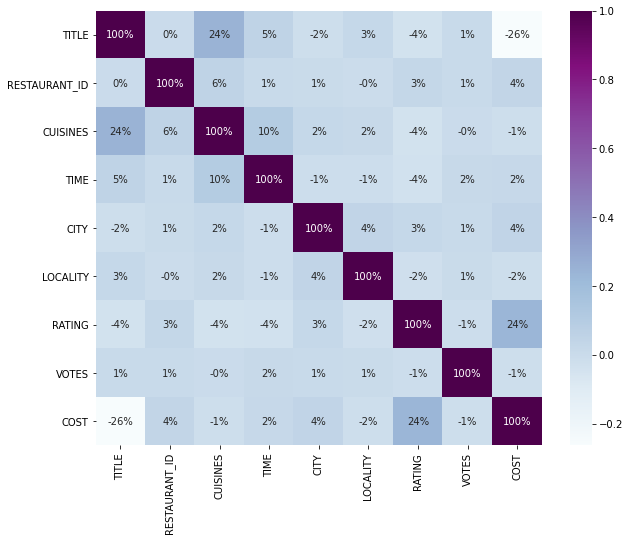

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuPu")
plt.show()

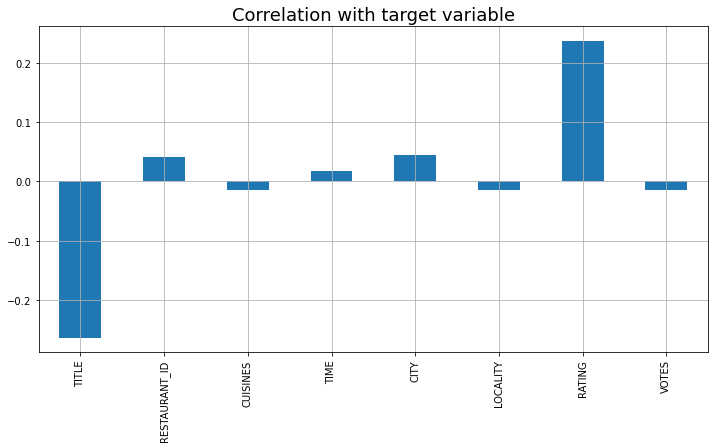

In [160]:
#correlation with target variable
plt.figure(figsize=(12,6))
train_data.drop("COST",axis=1).corrwith(train_data["COST"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("Correlation with target variable",fontsize=18)
plt.show()

# Ploting Outliers

TITLE               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
RESTAURANT_ID    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
CUISINES         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
TIME             AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
CITY             AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
LOCALITY         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
RATING           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
VOTES                  AxesSubplot(0.125,0.125;0.0945122x0.343182)
COST                AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

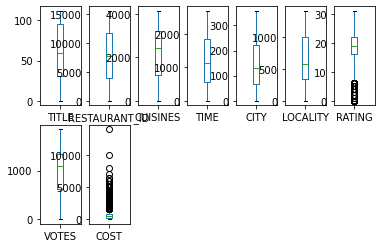

In [161]:
train_data.plot(kind="box",subplots=True,layout=(2,7))

# Removing Outliers

In [162]:
from scipy.stats import zscore

In [164]:
z=np.abs(zscore(train_data))
z

array([[0.86888688, 0.37269233, 0.32540837, ..., 0.29054698, 0.59388432,
        0.86884552],
       [0.80783894, 1.20737672, 1.61638078, ..., 0.68015275, 0.08589126,
        1.34733058],
       [0.86888688, 0.70057234, 0.61526483, ..., 0.0330196 , 0.57914305,
        0.23086546],
       ...,
       [0.35207201, 0.74896628, 0.12224961, ..., 0.35658617, 0.9047573 ,
        1.02834054],
       [0.86888688, 0.36076439, 1.055448  , ..., 0.45233026, 0.00944312,
        0.40711461],
       [0.86888688, 0.29505519, 0.59034881, ..., 0.61411355, 1.06433876,
        0.08812458]])

In [165]:
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1288,  1297,
        1345,  1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,
        1543,  1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,
        1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,  1806,
        1828,  1839,  1855,  1878,  1884,  1884,  1903,  1916,  1930,
        1931,  1983,  2025,  2039,  2053,  2082,  2092,  2096,  2100,
        2109,  2111,  2115,  2124,  2205,  2207,  2251,  2254,  2313,
        2327,  2333,  2339,  2349,  2369,  2407,  2434,  2439,  2459,
        2479,  2488

In [167]:
train=train_data[(z<3).all(axis=1)]
print(train.shape)
print(train_data.shape)

(11972, 9)
(12690, 9)


# Percent data of loss 

In [168]:
loss_percent=(12690-11972)/12690*100

In [169]:
loss_percent

5.6579984239558705

# Feature Selection

In [172]:
x=train.drop(columns=["COST"],axis=1)
y=train["COST"]

In [173]:
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,9438,2627,739,320,285,17,1278
1,33,13198,289,1885,67,1046,23,950
2,31,10915,2976,661,67,1101,19,712
3,95,6346,4130,275,222,136,22,787
4,50,15387,1766,615,222,620,19,470
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,19,1349
12686,33,9686,2143,1177,222,133,24,191
12687,71,11133,2088,1137,239,1342,21,1428
12688,31,6134,3506,1837,67,631,16,996


In [174]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 11972, dtype: int64

In [175]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [177]:
print(x_train.shape)
print(x_test.shape)

(8380, 8)
(3592, 8)


In [178]:
print(y_train.shape)
print(y_test.shape)

(8380,)
(3592,)


In [179]:
#importing all library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#import boosting library
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import metrics library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [183]:
#all algorithm using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is")
    print("MAE",mean_absolute_error(y_test,predm))
    print("MSE",mean_squared_error(y_test,predm))
    print("RSME",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("****************************************************************************************************")
    print("/n")

Score of LinearRegression() is
MAE 280.7890543118195
MSE 163223.40841457134
RSME 404.0091687258735
R2 Score: 0.20036503202693723
****************************************************************************************************
/n
Score of Lasso() is
MAE 280.69315066340846
MSE 163240.55525460484
RSME 404.0303890236536
R2 Score: 0.20028102929096825
****************************************************************************************************
/n
Score of Ridge() is
MAE 280.7888909258254
MSE 163223.56663115008
RSME 404.0093645339797
R2 Score: 0.20036425692053506
****************************************************************************************************
/n
Score of ElasticNet() is
MAE 287.7935089886459
MSE 168156.5319750662
RSME 410.0689356377367
R2 Score: 0.1761975542207863
****************************************************************************************************
/n
Score of SVR() is
MAE 267.62173010717083
MSE 180701.0389355716
RSME 425.0894481583512
R2 Score: 0

In [184]:
#cross val score
model=[DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for n in model:
    score=cross_val_score(n,x,y,cv=10,scoring="r2")
    print("Model",n)
    print("SCORE",score)
    print("mean score",score.mean())
    print("Standard Deviation",score.std())
    print("********************************************************************************************")
    print("/n")

Model DecisionTreeRegressor()
SCORE [0.41546856 0.35920959 0.30524497 0.37077178 0.38204033 0.41744135
 0.39619638 0.37917635 0.479044   0.39024572]
mean score 0.3894839036307749
Standard Deviation 0.042482933612959226
********************************************************************************************
/n
Model KNeighborsRegressor()
SCORE [0.32196106 0.32719521 0.28109645 0.27910488 0.30132728 0.33158622
 0.35109722 0.25431144 0.40609577 0.31538923]
mean score 0.3169164768891406
Standard Deviation 0.04042908330428879
********************************************************************************************
/n
Model RandomForestRegressor()
SCORE [0.71348472 0.69505811 0.64557902 0.69425818 0.67437853 0.66808669
 0.6829675  0.69027211 0.73673981 0.7201796 ]
mean score 0.6921004278522279
Standard Deviation 0.025285422439063596
********************************************************************************************
/n
Model AdaBoostRegressor()
SCORE [0.3547858  0.39684287 0.1

# RandomForestRegressor gives best score as i choose that my final model

In [186]:
#using grid searchcv to find best parameter
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[700,800,900,1000],"max_depth":[7,12,15,20]}
rfc=RandomForestRegressor()
clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 1000}


In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rf=RandomForestRegressor(n_estimators=1000,min_samples_split=15,min_samples_leaf=1,max_features="auto",max_depth=20)
rf.fit(x_train,y_train)
print("Score:",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("/n")

print("mean_squared_error:",mean_squared_error(y_test,predrf))
print("mean_absolute_error:",mean_absolute_error(y_test,predrf))
print("root_mean_squared_edrror:",np.sqrt(mean_squared_error(y_test,predrf)))
print("/n")
print("R2_score:",r2_score(y_test,predrf))
print("/n")

Score: 0.8628146948193378
/n
mean_squared_error: 65104.94330873765
mean_absolute_error: 174.91550733769643
root_mean_squared_edrror: 255.156703436805
/n
R2_score: 0.6810494906138539
/n


# Now our score is increased

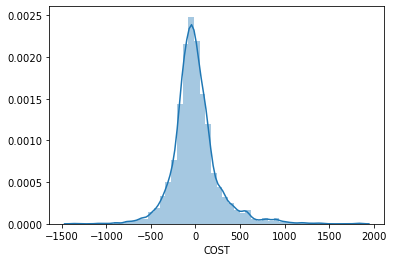

In [189]:
sns.distplot(y_test-predrf)

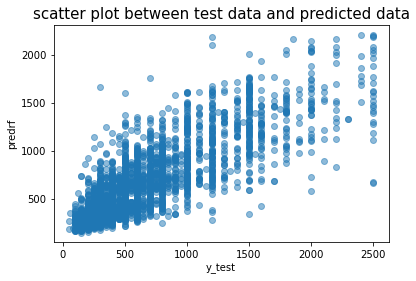

In [190]:
plt.scatter(y_test,predrf,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predrf")
plt.title("scatter plot between test data and predicted data",fontsize=15)
plt.show()

# conclusion:

In [191]:
train=np.array(y_test)
predicted=np.array(rf.predict(x_test))

In [192]:
predicted=pd.DataFrame({"train":train,"predicted":predicted},index=range(len(train)))

In [193]:
predicted

,train,predicted
0,300,396.248393
1,1200,727.574996
2,500,728.685153
3,300,480.861356
4,900,1269.560081
...,...,...
3587,300,690.530109
3588,300,322.923521
3589,400,284.300834
3590,500,649.272909


In [206]:
import pickle

In [207]:
filename="restaurant_food.pkl"
pickle.dump(rf,open(filename,"wb"))

# Test Data

In [203]:
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,94,662,23,823
1,75,12680,1632,933,83,221,22,871
2,23,1411,1455,219,83,411,18,575
3,66,204,208,1071,34,456,18,179
4,75,13453,1637,208,66,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,9057,1425,103,93,597,19,487
4227,66,1247,267,262,8,237,23,722
4228,75,8617,679,1052,34,696,17,789
4229,75,6485,1541,215,66,332,0,861


In [204]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_data=sc.fit_transform(test_data)

In [205]:
test_data.shape

(4231, 8)

In [208]:
#With the best score i will test data
Fitted_model=pickle.load(open("restaurant_food.pkl","rb"))

In [209]:
Fitted_model

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=1000)

In [210]:
prediction=Fitted_model.predict(test_data)

In [211]:
prediction

array([1231.91085883,  378.29568503,  730.37068921, ...,  322.87380233,
        410.9831362 ,  505.50501795])

# conclusion:

In [212]:
train

array([ 300, 1200,  500, ...,  400,  500, 1400], dtype=int64)

In [220]:
train=np.array(y_test)

In [221]:
test=np.array(Fitted_model.predict(test_data))

In [223]:
train

array([ 300, 1200,  500, ...,  400,  500, 1400], dtype=int64)

In [224]:
test

array([1231.91085883,  378.29568503,  730.37068921, ...,  322.87380233,
        410.9831362 ,  505.50501795])

In [226]:
train=pd.DataFrame(predrf,columns=["COST"])

In [227]:
train

,COST
0,396.248393
1,727.574996
2,728.685153
3,480.861356
4,1269.560081
...,...
3587,690.530109
3588,322.923521
3589,284.300834
3590,649.272909


In [229]:
test=pd.DataFrame(Fitted_model.predict(test_data),columns=["COST"])

In [230]:
test

,COST
0,1231.910859
1,378.295685
2,730.370689
3,480.632833
4,405.057455
...,...
4226,871.647738
4227,1623.254850
4228,322.873802
4229,410.983136
